In [1]:
import matplotlib.pyplot as plt
import pandas as pd

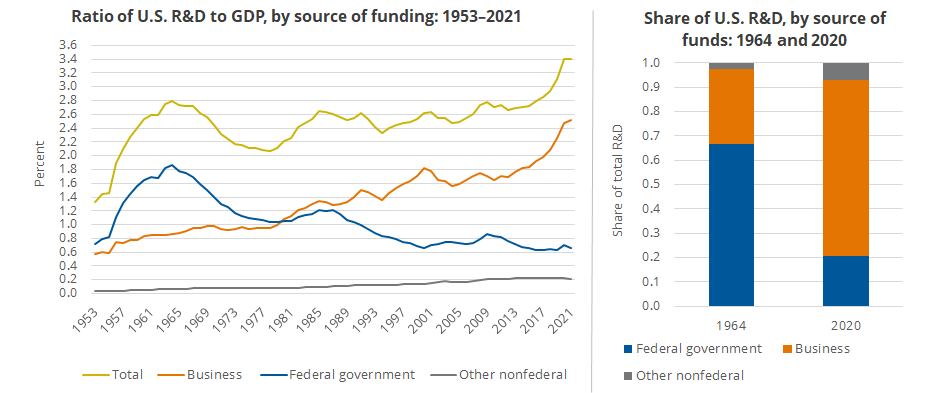

In [29]:
df = pd.read_csv("data.csv", index_col='Year')
df.head()

,Total,Business,Federal government,Other nonfederal
Year,,,,
1953,1.33,0.58,0.71,0.03
1954,1.44,0.61,0.79,0.04
1955,1.45,0.59,0.82,0.04
1956,1.89,0.74,1.11,0.04
1957,2.09,0.73,1.31,0.04


In [30]:
plt.rcParams['figure.figsize'] = [7.48, 3]
plt.rcParams['figure.dpi'] = 500
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

BLUE1 = "#152B52"
BLUE2 = "#485884"
BLUE3 = "#727f97"
YELLOW = "#D4A418"

GRAY = "#7F7F7F"
BLACK = "#111111"

FONTSIZE = 8

In [31]:
color_mapping = {
    'Total': BLACK,
    'Federal government': BLUE2,
    'Other nonfederal': BLUE3,
    'Business': YELLOW
}
focus_years = [1964, 2020]
bar_width = 0.5

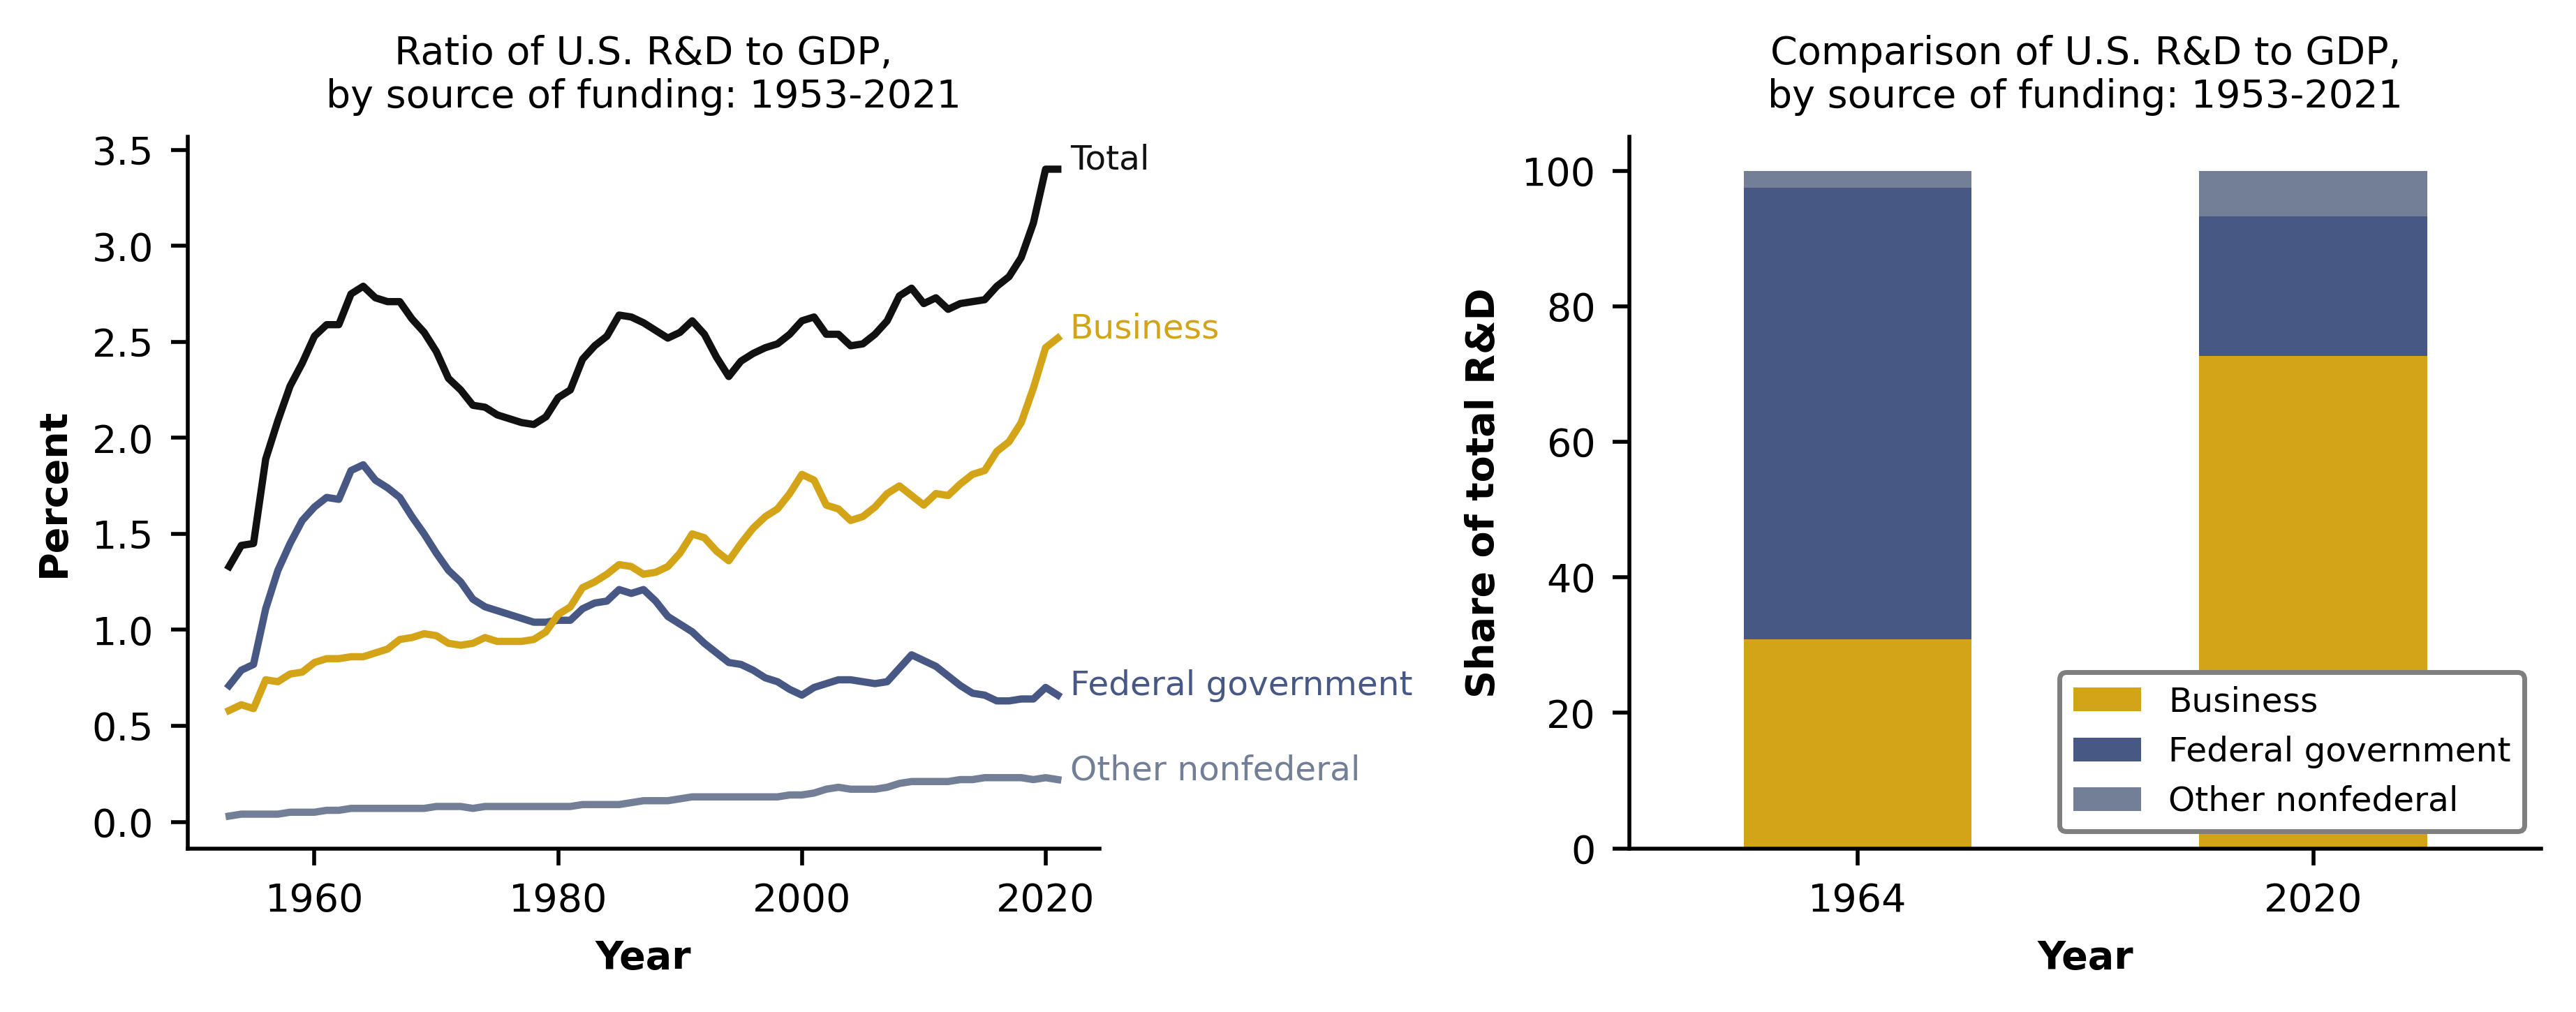

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2)

ax1 = axes[0]
ax2 = axes[1]

year_labels = [str(x) for x in focus_years]

xs = list(df.index)
for label, color in color_mapping.items():    
    ys = df[label].to_list()
    ax1.plot(xs, ys, color=color, label=label)
    ax1.annotate(label, xy=(xs[-1]+1, ys[-1]), color=color, size=FONTSIZE-1)

(df
 .div(df['Total'], axis=0)
 .apply(lambda x: x*100)
 .drop(columns='Total')
 .loc[focus_years]
 .plot.bar(stacked=True, rot=0, color=color_mapping, width=bar_width, ax=ax2)
)


ax1.set_xlabel('Year', fontsize=FONTSIZE, weight='bold')
ax2.set_xlabel('Year', fontsize=FONTSIZE, weight='bold')
ax1.set_ylabel('Percent', fontsize=FONTSIZE, weight='bold')
ax2.set_ylabel('Share of total R&D', fontsize=FONTSIZE, weight='bold')

ax1.tick_params('both', labelsize=FONTSIZE)
ax2.tick_params('both', labelsize=FONTSIZE)

legend = ax2.legend(loc='lower right', edgecolor=GRAY, fontsize=FONTSIZE-1)
legend.get_frame().set_alpha(None)


ax1.set_title("Ratio of U.S. R&D to GDP,\nby source of funding: 1953-2021", fontsize=FONTSIZE)
ax2.set_title("Comparison of U.S. R&D to GDP,\nby source of funding: 1953-2021", fontsize=FONTSIZE)

plt.tight_layout()
plt.savefig("public_rd_funding.png")

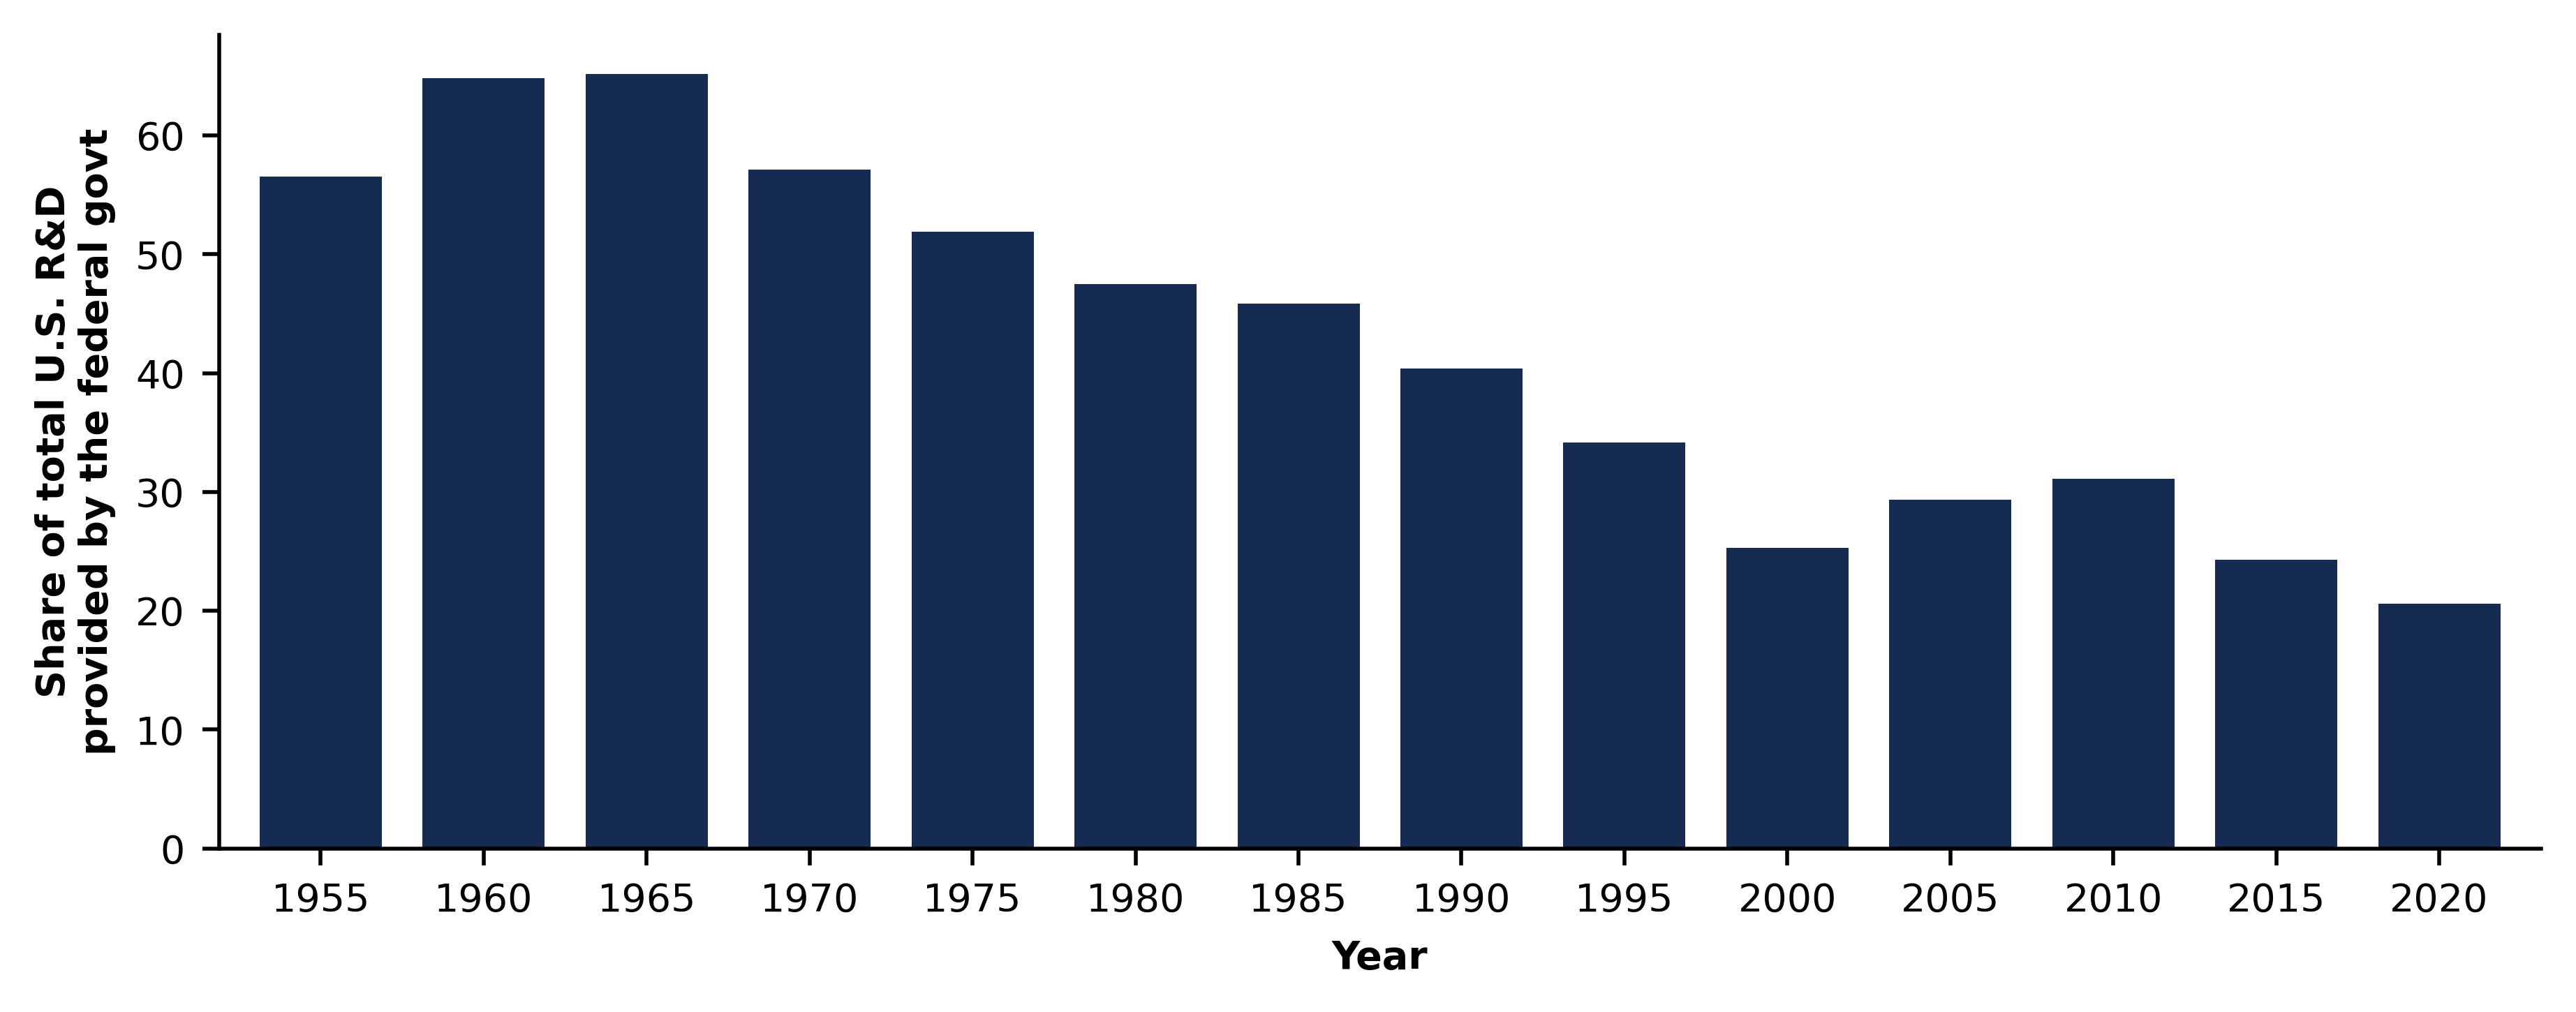

In [43]:
fig, ax = plt.subplots()

xs = list(range(1955,2022,5))
(df
 .div(df['Total'], axis=0)
 .apply(lambda x: x*100)
 .loc[xs, 'Federal government']
 .plot.bar(stacked=True, rot=0, color=BLUE1, width=0.75, ax=ax)
)

ax.set_xlabel('Year', fontsize=FONTSIZE, weight='bold')
ax.set_ylabel('Share of total U.S. R&D\nprovided by the federal govt', fontsize=FONTSIZE, weight='bold')

ax.tick_params('both', labelsize=FONTSIZE)

plt.tight_layout()
#plt.savefig("public_rd_funding.png")